## Introduction to database

The water_potability.csv file contains water quality metrics for 3276 different water bodies. Here is the link of the dataset : https://www.kaggle.com/datasets/adityakadiwal/water-potability

#### Feature Description

1. ph: pH of 1. water (0 to 14).

2. Hardness: Capacity of water to precipitate soap in mg/L.

3. Solids: Total dissolved solids in ppm.

4. Chloramines: Amount of Chloramines in ppm.

5. Sulfate: Amount of Sulfates dissolved in mg/L.

6. Conductivity: Electrical conductivity of water in μS/cm.

7. Organic_carbon: Amount of organic carbon in ppm.

8. Trihalomethanes: Amount of Trihalomethanes in μg/L.

9. Turbidity: Measure of light emiting property of water in NTU.

10. Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

# ML Pipeline

In [15]:
# import the libraries
import pandas as pd
import numpy as np
import io 
import dvc.api
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import (GridSearchCV, KFold, train_test_split, cross_val_score)

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline

import mlflow
import mlflow.sklearn
from urllib.parse import urlparse

In [4]:
#import the dataset
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
#print the data shape
df.shape

(3276, 10)

In [6]:
#provide the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
#check the null values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
#check the unique values in each parameter
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#### Dataset Preprocessing

In [10]:
#fill the missing values with median of the attribute
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)

In [11]:
print('Checking to see any more missing data \n')
df.isnull().sum()

Checking to see any more missing data 



ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#### Feature Engineering

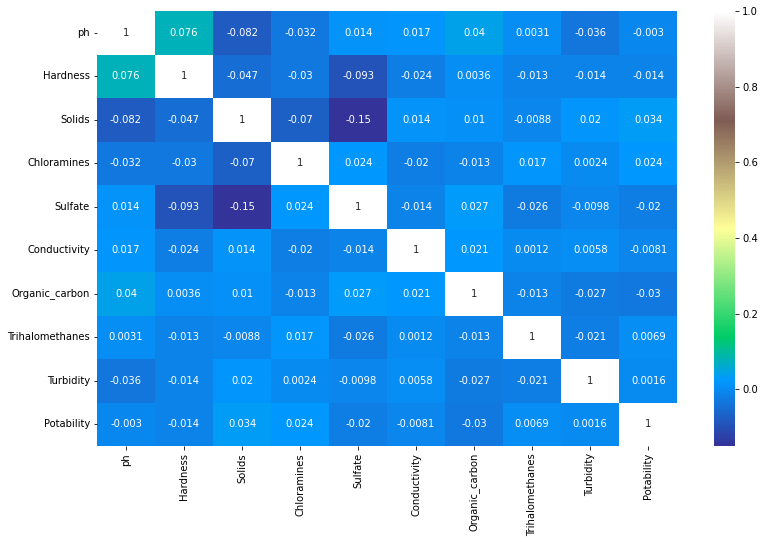

In [13]:
#plot the heatmap to check the co-relation between the parameters
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap='terrain')
plt.show()

In [14]:
##################### Preparing the Data for Modelling ######################

X = df.drop('Potability', axis = 1).copy()
Y = df['Potability'].copy()

####################split the dataset for classifier#########################
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)

#### Creating Pipeline using sklearn library

In [33]:
from imblearn.pipeline import Pipeline

##############creating pipeline for multiple classifier################
pipe_dt = Pipeline([('scaler', StandardScaler()), 
                    ('smote',SMOTE()),
                    ('DecisionTree', DecisionTreeClassifier())])
pipe_rf = Pipeline([('scaler', StandardScaler()), 
                    ('smote',SMOTE()),
                    ('RandomForest', RandomForestClassifier())])
pipe_xgb = Pipeline([('scaler', StandardScaler()), 
                     ('smote',SMOTE()),
                     ('XGBoost', XGBClassifier())])

#create the list of multiple classifier
pipelines= [pipe_dt, pipe_rf, pipe_xgb]
pipeline_names = ['DecisionTreeClassifier','RandomForestClassifier', 'XGBClassifier']

# Loop to fit each of the three pipelines
for pipe in pipelines:
    pipe.fit(X_train, Y_train)

# Compare accuracies
for index, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % \
          (pipeline_names[index], val.score(X_test, Y_test)))

DecisionTreeClassifier pipeline test accuracy: 0.581
RandomForestClassifier pipeline test accuracy: 0.639
XGBClassifier pipeline test accuracy: 0.637


#### Advantages of creating pipeline

* It makes ML workflow much easier to read and understand.
* It enforces the implementation and order of steps in your project.
* These in turn make this work much more reproducible.
* It can also provide distributed computing option.

## MLFlow 

#### Create the model using default parameters

In [34]:
with mlflow.start_run():
    
        #choose the classifier based on above comparision
        train_accuracy=pipe_rf.score(X_train, Y_train)
        test_accuracy=pipe_rf.score(X_test, Y_test)

        prediction = pipe_rf.predict(X_test)
        print('Score: ',pipe_rf.score(X_test, Y_test))
        
        accuracy = accuracy_score(Y_test,prediction)*100
        f1 = f1_score(Y_test,prediction,average='weighted')

        # Log parameter, metrics, and model to MLflow
        mlflow.log_param('n_estimators',50)
        mlflow.log_param('max_depth',2)
        mlflow.log_param('min_samples_leaf',1)
        mlflow.log_param('bootstrap',True)

        mlflow.log_metric("Train Accuracy", train_accuracy)
        mlflow.log_metric("Test Accuracy", test_accuracy)
        mlflow.log_metric("f1_score",f1)
        mlflow.log_metric("accuracy", accuracy)

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
        mlflow.sklearn.log_model(pipe_rf, "model")

Score:  0.6387195121951219


Accuracy Score = 63.87195121951219
Confusion Matrix =
 [[271 131]
 [106 148]]
Classification Report =
               precision    recall  f1-score   support

           0       0.72      0.67      0.70       402
           1       0.53      0.58      0.56       254

    accuracy                           0.64       656
   macro avg       0.62      0.63      0.63       656
weighted avg       0.65      0.64      0.64       656



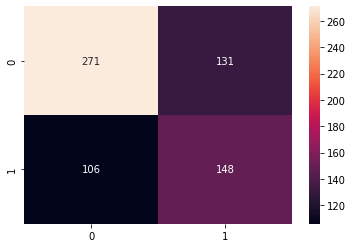

In [39]:
#Evaluation metric
print(f"Accuracy Score = {accuracy_score(Y_test,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction)}")

sns.heatmap(confusion_matrix(Y_test, prediction), annot=True, fmt='d')
plt.show()

#### Hyperparameter Tuning using GridSearchCV

In [37]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

with mlflow.start_run():
    
    # define model's hyperparameters
    parameters = {
      'RandomForest__n_estimators':[50, 100, 200, 300],
      'RandomForest__max_depth': [2, 4, 6, 8, 10],
      'RandomForest__min_samples_leaf' : [1, 5, 10],
      'RandomForest__bootstrap' : [True, False]
      }

    # define grid search
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search_rf = GridSearchCV(estimator = pipe_rf, param_grid=parameters, n_jobs=-1, cv=cv,
                               scoring='accuracy')

    grid_search_rf.fit(X_train, Y_train)
    
    best_params = grid_search_rf.best_params_
    grid_search_rf.cv_results_
    print(best_params)
    print('Score: ',grid_search_rf.score(X_test, Y_test))
    
    train_accuracy_hp = grid_search_rf.score(X_train, Y_train)
    test_accuracy_hp = grid_search_rf.score(X_test, Y_test)

    prediction_hp = grid_search_rf.predict(X_test)
    
    accuracy_hp = accuracy_score(Y_test,prediction_hp)*100
    f1_hp = f1_score(Y_test,prediction_hp,average='weighted')
    
    # Log parameter, metrics, and model to MLflow
    mlflow.log_param('n_estimators',best_params['RandomForest__n_estimators'])
    mlflow.log_param('max_depth',best_params['RandomForest__max_depth'])
    mlflow.log_param('min_samples_leaf',best_params['RandomForest__min_samples_leaf'])
    mlflow.log_param('bootstrap',best_params['RandomForest__bootstrap'])

    mlflow.log_metric("Train Accuracy", train_accuracy_hp)
    mlflow.log_metric("Test Accuracy", test_accuracy_hp)
    mlflow.log_metric("f1_score",f1_hp)
    mlflow.log_metric("accuracy", accuracy_hp)

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
    mlflow.sklearn.log_model(grid_search_rf, "model")

{'RandomForest__bootstrap': True, 'RandomForest__max_depth': 10, 'RandomForest__min_samples_leaf': 1, 'RandomForest__n_estimators': 100}
Score:  0.6432926829268293


Accuracy Score = 69.59706959706959
Confusion Matrix =
 [[454  52]
 [197 116]]
Classification Report =
               precision    recall  f1-score   support

           0       0.70      0.90      0.78       506
           1       0.69      0.37      0.48       313

    accuracy                           0.70       819
   macro avg       0.69      0.63      0.63       819
weighted avg       0.69      0.70      0.67       819



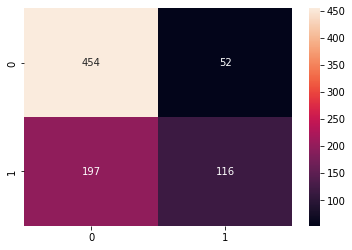

In [138]:
#Evaluation metric
print(f"Accuracy Score = {accuracy_score(Y_test,prediction_hp)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction_hp)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction_hp)}")

sns.heatmap(confusion_matrix(Y_test, prediction), annot=True, fmt='d')
plt.show()

#### Comparing the models performance using mlflow logs

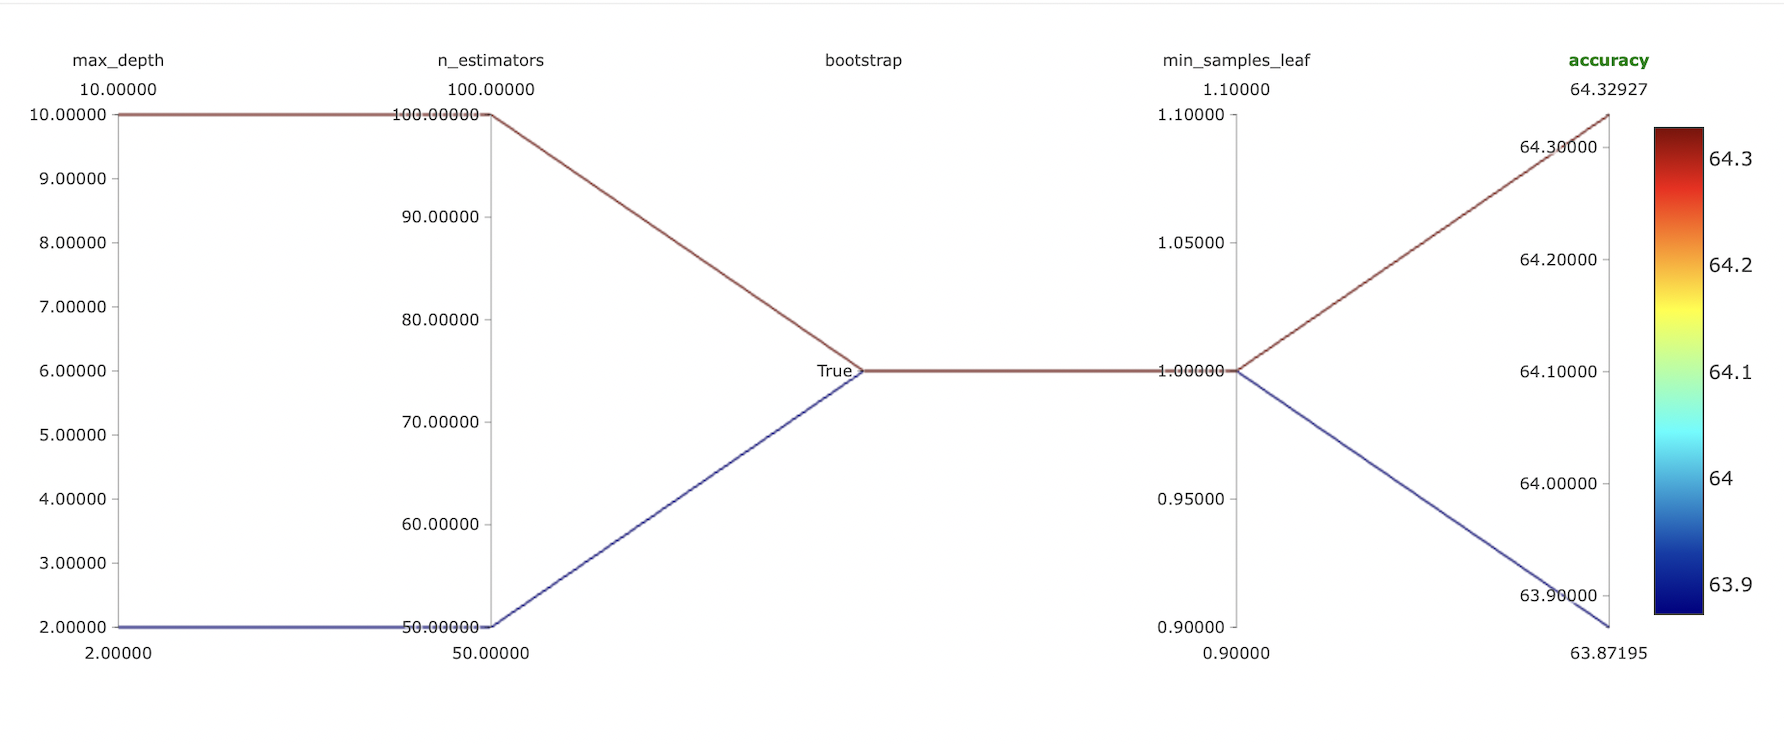

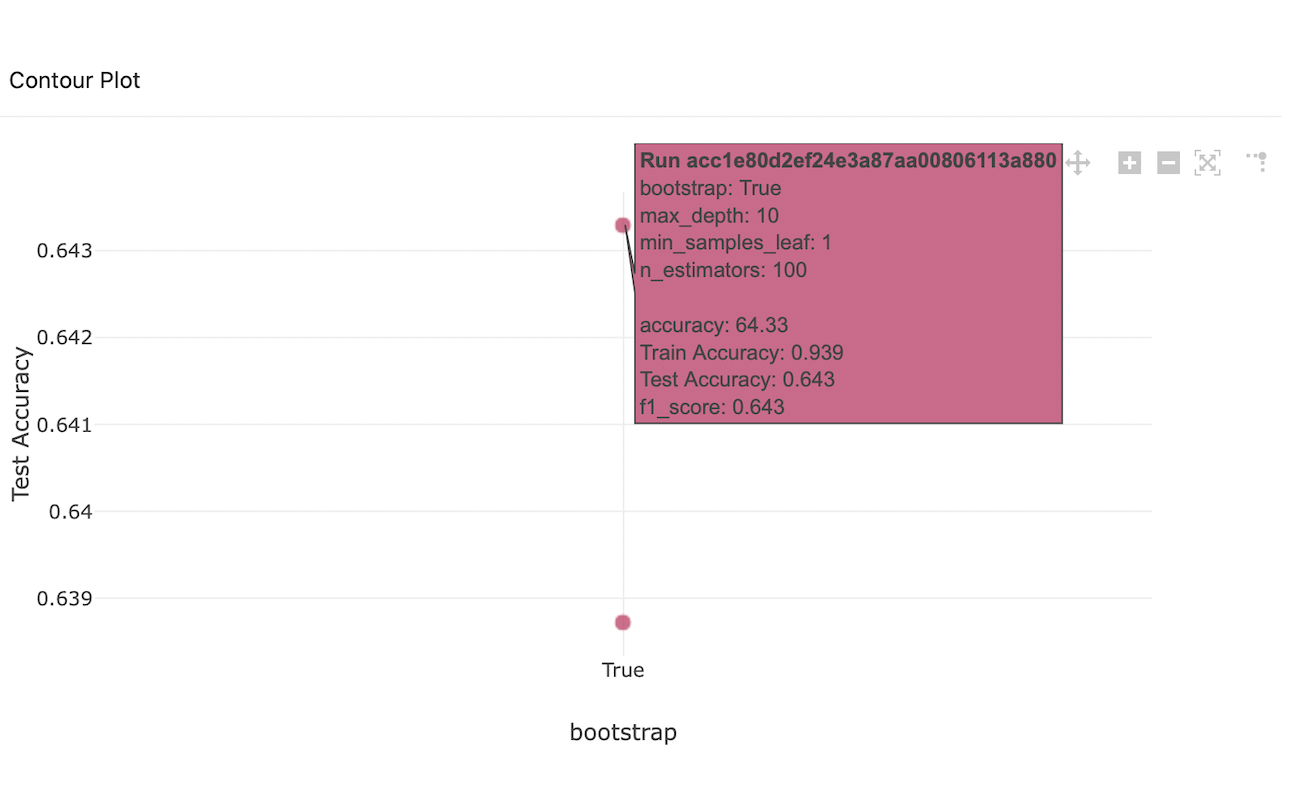

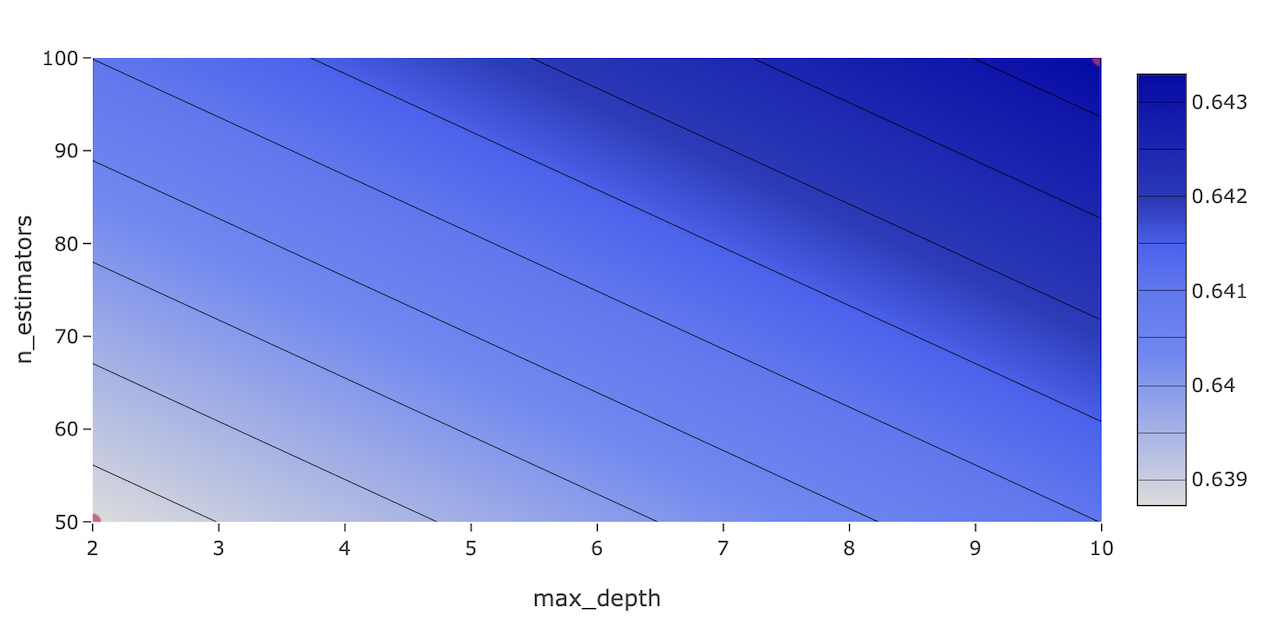

By comparing the logs of the mlflow, it can be clearly visible that after training model on Best Parameter fits given by Hyperparameter Tuning, the performance of model becomes better.

In [38]:
!mlflow ui

[2022-06-11 15:05:22 -0400] [47583] [INFO] Starting gunicorn 20.1.0
[2022-06-11 15:05:22 -0400] [47583] [INFO] Listening at: http://127.0.0.1:5000 (47583)
[2022-06-11 15:05:22 -0400] [47583] [INFO] Using worker: sync
[2022-06-11 15:05:22 -0400] [47584] [INFO] Booting worker with pid: 47584
^C
[2022-06-11 15:09:45 -0400] [47583] [INFO] Handling signal: int
[2022-06-11 15:09:45 -0400] [47584] [INFO] Worker exiting (pid: 47584)
